In [11]:
%matplotlib inline
from cvxpy import *
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
eps = 1e-3
x = np.arange(eps, 5, .25)
z = np.arange(eps, 5, .25)
X, Z = np.meshgrid(x,z)

Y = np.hstack((np.sqrt(np.multiply(X, Z)) - eps,
              -np.sqrt(np.multiply(X, Z)) + eps))
X = np.hstack((X,X))
Z = np.hstack((Z,Z))

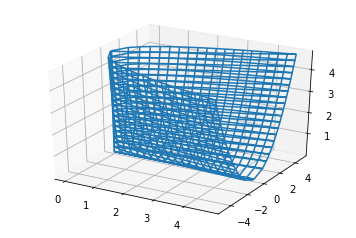

In [3]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_wireframe(X, Y, Z)

In [4]:
sdp_arr = np.stack((X,Y,Y,Z)).T.reshape((-1,2,2))

root_arr = np.linalg.cholesky(sdp_arr)

In [5]:
X_L = root_arr[:,0,0].reshape(X.shape)
Y_L = root_arr[:,1,0].reshape(Y.shape)
Z_L = root_arr[:,1,1].reshape(Z.shape)

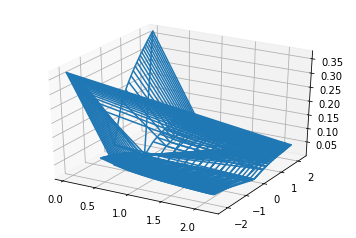

In [6]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_wireframe(X_L, Y_L, Z_L)

In [7]:
x = np.random.randn(40000).reshape(-1,2,2)
psds = np.einsum('lij,ljk->lik', x, x.transpose(0,2,1))
X = psds[:,0,0]
Y = psds[:,1,0]
Z = psds[:,1,1]

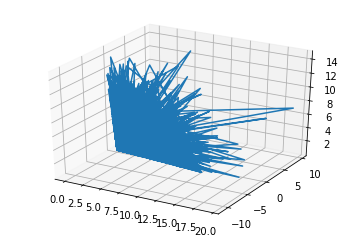

In [8]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_wireframe(X, Y, Z)

In [9]:
root_arr = np.linalg.cholesky(psds)
X_L = root_arr[:,0,0].reshape(X.shape)
Y_L = root_arr[:,1,0].reshape(Y.shape)
Z_L = root_arr[:,1,1].reshape(Z.shape)

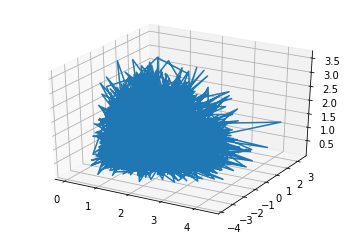

In [10]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_wireframe(X_L, Y_L, Z_L)